In [11]:
%load_ext autoreload
%autoreload 2
from google import genai
from IPython.display import Image as IPImage
from IPython.display import display
from PIL import Image
import torch

from ai_storytime.utils import get_gemini_api_key
from ai_storytime.tts import tts
from ai_storytime.asr import asr
from ai_storytime.models import Story

try:
    GEMINI_API_KEY = get_gemini_api_key()
    print("GEMINI_API_KEY loaded successfully.")
except ValueError as e:
    raise RuntimeError("GEMINI_API_KEY not found.") from e

client = genai.Client(api_key=GEMINI_API_KEY)
model_id = "gemini-2.0-flash"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found GEMINI_API_KEY using strategy: _get_from_env
GEMINI_API_KEY loaded successfully.
Using device: cuda


# Gemini Docs

* https://github.com/googleapis/python-genai
* https://ai.google.dev/gemini-api/docs/text-generation

# Text input

In [3]:
res = client.models.generate_content(
    model=model_id,
    contents=["告訴我一個關於臺灣的無聊事實。"],
)
print(res.text)

臺灣的垃圾車播放著兩首特定的音樂：一首是貝多芬的《給愛麗絲》，另一首是波蘭作曲家泰克拉·巴拉諾夫斯卡的《少女的祈禱》。這是一個提醒居民出來丟垃圾的信號。



# Image input

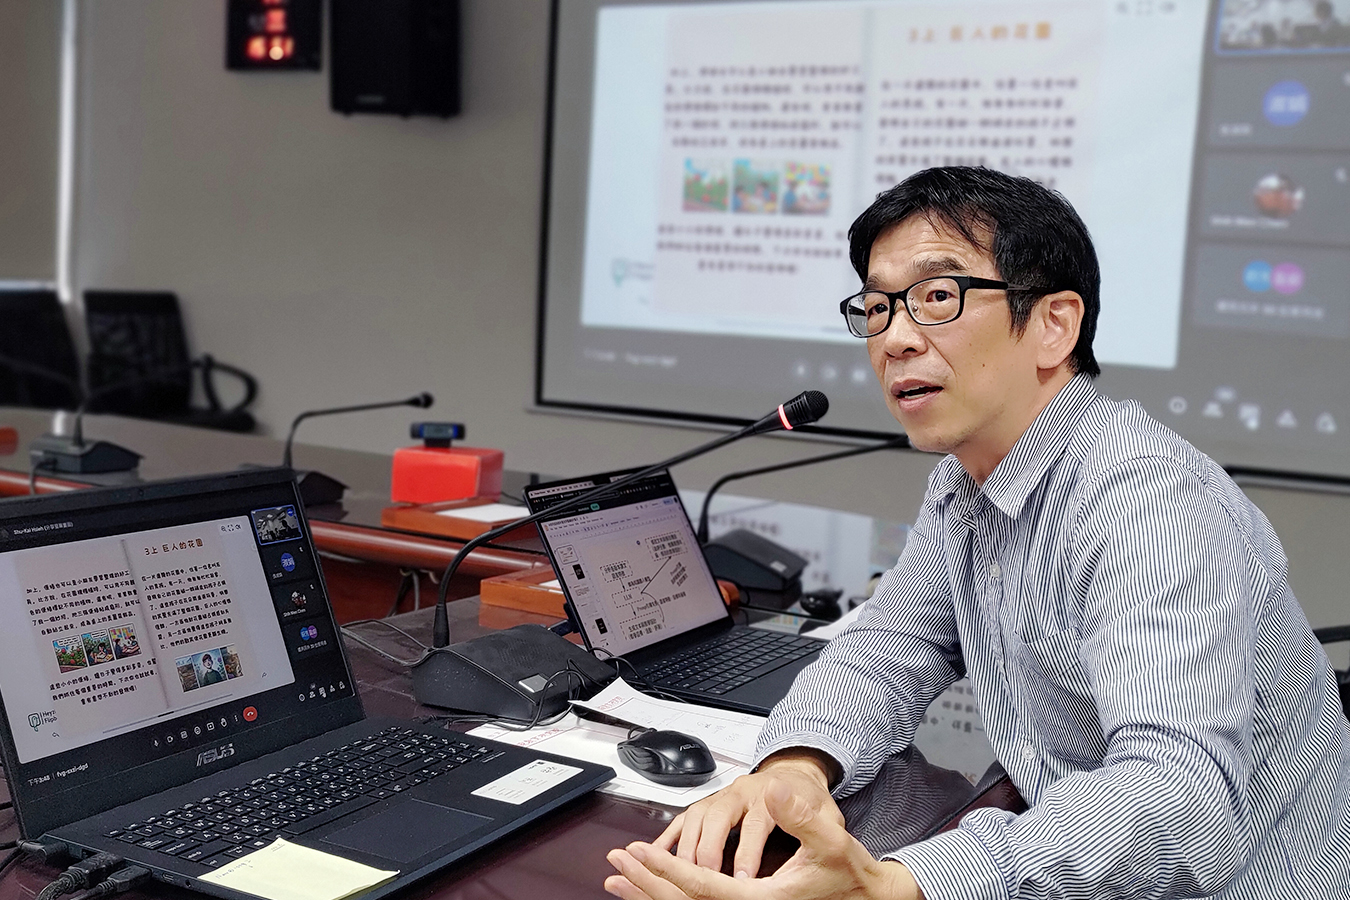

In [12]:
img_path = "../data/img/shuuukai.jpg"
image = Image.open(img_path)
display(IPImage(img_path, width=600))

In [13]:
res = client.models.generate_content(
    model=model_id,
    contents=[image, "跟我介紹這張圖片的內容。"],
)
print(res.text)

好的，這是一張照片，顯示一個人坐在桌子前，似乎正在進行演示或講座。以下是一些細節：

*   **人物：** 照片中有一位戴著眼鏡的男性，他穿著條紋襯衫。他坐在桌子旁，面前有麥克風，看起來正在說話或演講。
*   **設備：** 桌子上有兩台筆記型電腦。一台筆記型電腦的螢幕上顯示著演示文稿，另一台則顯示流程圖或其他圖表。桌面上還有滑鼠、麥克風和一些文具。
*   **背景：** 背景中有一台投影機，上面投射著演示文稿。
*   **整體氛圍：** 整體氛圍表明這可能是在會議室或教室裡進行的正式演講或演示。


In [3]:
with open("../data/story/story.json", "r") as f:
    story = Story.model_validate_json(f.read())

In [7]:
text_and_img = story.gather_text_and_images("../data/story/img/")
text_and_img

['Page cover',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1536>,
 'Page 1',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1536>,
 '從前從前，有羊媽媽和七隻小羊。\n媽媽要去森林，叮嚀孩子們：「要小心大野狼！牠聲音粗啞，腳是黑色的！」\n\n沒多久，叩叩叩！\n一個粗啞的聲音說：「開門啊，媽媽回來了！」\n小羊們大叫：「不開！你是大野狼！」',
 'Page 2',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1536x1024>,
 '大野狼吃了粉筆，又來敲門，聲音變細了。\n但牠把黑爪子放在窗邊。\n\n小羊們又叫：「不開！媽媽的腳不是黑色的！」\n\n於是大野狼去找麵包師傅和磨坊主人，把腳抹上麵糰和麵粉弄白。',
 'Page 3',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 '壞蛋第三次來敲門，伸進白色的腳。\n小羊們相信了，把門打開。',
 'Page 4',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 '結果衝進來的是大野狼！\n小羊們嚇壞了，趕快躲到桌下、床上、爐子裡、櫥櫃裡、洗臉盆下和鐘殼裡！',
 'Page 5',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 '大野狼把躲起來的小羊一個個找出來，吞進肚子裡。\n只有躲在鐘殼裡最小的沒被找到。\n\n吃飽後，牠走到外面草地上，躺在樹下睡著了。',
 'Page 6',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1536>,
 '羊媽媽回來，看到家裡亂七八糟，孩子都不見了，傷心地哭了起來。\n\n這時，最小的羊從鐘殼裡叫著：「媽媽，我在這裡！大野狼把哥哥姐姐們都吃掉了！」',
 'Page 7',
 <PIL.P

In [8]:
chat = client.chats.create(model=model_id)

In [17]:
res = chat.send_message_stream(
    message=[image, "跟我介紹這張圖片的內容。"]
)
for chunk in res:
    print(chunk.text, end="", flush=True)

這張圖片顯示一個人在類似會議室的環境中發表演講或簡報。

主要人物：
*   一位戴眼鏡的亞洲男性，穿著藍白相間的條紋襯衫。他正對鏡頭說話，顯然是活動的焦點。
*   他面前有一支麥克風，表示他正在演講或簡報。

佈景和設備：

*   桌子上有兩台筆記型電腦。一台顯示著文件或簡報，另一台顯示著流程圖或圖像。
*   在簡報的背景中，我們可以看到“3上巨人的花園”的標題和圖片，這可能是簡報的主題。
*   一個投影幕顯示著簡報的內容，使其他參與者可以很容易地看到正在發生的事情。
*   可以觀察到標準會議室設置，例如額外的麥克風和講台，這表明這是一個正式的演示或會議。

總體來說，照片捕捉到了這個人講述簡報或演講的時刻，周圍的設備增強了他的演講。

In [16]:
chat.get_history()

[UserContent(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=Blob(data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\x84\x05F\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuv

In [10]:
from PIL import Image

In [11]:
Image.MIME[text_and_img[1].format]

'image/png'

In [18]:
import gradio as gr
msg = gr.ChatMessage(role="assistant", content="")

In [19]:
for char in "Hello, World!":
    msg.content += char
    print(msg.content, end="", flush=True)

HHeHelHellHelloHello,Hello, Hello, WHello, WoHello, WorHello, WorlHello, WorldHello, World!

In [8]:
import gradio as gr